In [71]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import describe
from scipy.stats.mstats import gmean
from scipy.stats import multivariate_t

import matplotlib.pyplot as plt
import scipy.linalg
import pprint as pprint
import time as time
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from scipy.stats import t
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats import spearmanr
from scipy.stats import multivariate_normal


ImportError: cannot import name 'mean' from 'scipy.stats' (c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\__init__.py)

In [ ]:
# Problem 1

#if x and y is normal, can just use multivariate normal, y = f(X, epsilon)


#matrix of [X E] ~ N(u,E)
#X ~ N(u, E)
#E ~ N(0, I)
#y = f(X, epsilon)
#epsilon ~ N(0, I)

#matrix = Sigma

#[x epsilon] ~ (u,sigma)   where u = [x1 zero]

#y = f(x, epsilon)   observed x and epsilon which is error term to get y  There is a beta value there usually

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


VaR: 8.1255
ES: 11.1715


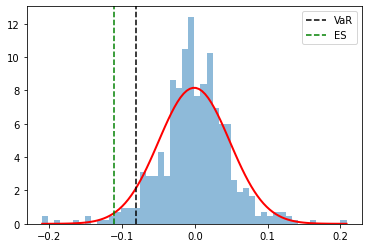

In [100]:

from scipy.stats import norm
from scipy.stats import rv_continuous
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Read in the CSV file with pandas
data = pd.read_csv('problem1.csv')

#convert to numpy array
# data = data.to_numpy()

def fit_normal(x):
    x = x.to_numpy()
    # Mean and Std values
    m = np.mean(x)
    s = np.std(x)
    
    # Create the error model
    error_model = norm(m, s)
    
    # Calculate the errors and U
    errors = x - m
    u = error_model.cdf(x)
    
    # Define the evaluation function
    def eval_func(u):
        return error_model.ppf(u)
    
    # Return the fitted model
    return {"errors": errors, "u": u, "eval": eval_func, "model": error_model}


NormDistFitted = fit_normal(data)

num_simulations = 1000
simulated_value = NormDistFitted['model'].rvs(num_simulations)



def VaRFittedNormal(data, alpha = .05):
    NormDistFitted = fit_normal(data)
    var = -NormDistFitted['model'].ppf(alpha)
    pdf = NormDistFitted['model'].pdf
    def ES_func_norm(x):
        return x * pdf(x)
    ES, _ = quad(ES_func_norm, -np.inf, var)
    ES = -ES / alpha
    return {"VaR": var, "ES": ES}

# Calculate VaR
alpha = 0.05 
var = -NormDistFitted['model'].ppf(alpha)
pdf = NormDistFitted['model'].pdf


# Calculate Expected Shortfall

def ES_func_norm(x):
    return x * pdf(x)

ES, _ = quad(ES_func_norm, -np.inf, var)
ES = -ES / alpha

# Print the results
print('VaR: {:.4f}'.format(var*100))
print('ES: {:.4f}'.format(ES*100))

# Plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(data), np.max(data), 100)
y = NormDistFitted['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var, color='black', linestyle='--', label='VaR')
plt.axvline(-ES, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()



In [11]:
def VaRFittedNormal(data, alpha = .05):
    NormDistFitted = fit_normal(data)
    var = -NormDistFitted['model'].ppf(alpha)
    pdf = NormDistFitted['model'].pdf
    def ES_func_norm(x):
        return x * pdf(x)
    ES, _ = quad(ES_func_norm, -np.inf, var)
    ES = -ES / alpha
    return {"VaR": var, "ES": ES}

results = VaRFittedNormal(data, alpha = .05)
print(results)

{'VaR': 0.08125483171032236, 'ES': 0.11171522323912937}


In [37]:
def VaRFittedNormalSimulated(data, alpha=0.05, num_simulations=1000):
    NormDistFitted = fit_normal(data)
    simulated_value = NormDistFitted['model'].rvs(num_simulations)
    var = -np.quantile(simulated_value, alpha)
    pdf = NormDistFitted['model'].pdf
    def ES_func_norm(x):
        return x * pdf(x)
    ES, _ = quad(ES_func_norm, -np.inf, var)
    ES = -ES / alpha
    return {"VaR": var, "ES": ES}

stuff = VaRFittedNormal(data, alpha = .05, num_simulations= 1000)
print(stuff)

{'VaR': 0.07806454132319025, 'ES': 0.12238321720750951}


In [9]:
from scipy.stats import norm
from scipy.integrate import quad
import numpy as np

def fit_normal(x):
    # Mean and Std values
    m = np.mean(x)
    s = np.std(x)
    
    # Create the error model
    error_model = norm(m, s)
    
    # Calculate the errors and U
    errors = x - m
    u = error_model.cdf(x)
    
    # Define the evaluation function
    def eval_func(u):
        return error_model.ppf(u)
    
    # Return the fitted model
    return {"errors": errors, "u": u, "eval": eval_func, "model": error_model}

def calc_VaR_from_Fitted(fitted_data):
    NormDistFitted = fit_normal(data)
    
    # Calculate the var value
    var = -NormDistFitted['model'].ppf(alpha)

def calc_ES(data, alpha):
    # Fit the normal distribution to the data
    NormDistFitted = fit_normal(data)
    
    # Calculate the var value
    var = -NormDistFitted['model'].ppf(alpha)
    
    # Define the ES function
    def ES_func_norm(x):
        return x * NormDistFitted['model'].pdf(x) / alpha if x <= var else NormDistFitted['eval'](x) - var
    
    # Calculate the ES using quadrature integration
    ES, _ = quad(ES_func_norm, -np.inf, np.inf)
    ES = -ES
    
    return ES

data = pd.read_csv('problem1.csv')

data = data.to_numpy()
ExpShortfall = calc_ES(data, alpha = .05)

C:\Users\Moneybag Mike\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\_minimize.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)


VaR: 7.6476
ES: 11.4446


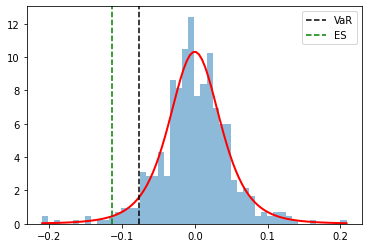

In [102]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

import numpy as np

from scipy.optimize import minimize

data = pd.read_csv('problem1.csv')

#convert to numpy array
# data = data.to_numpy()


def general_t_ll(mu, s, nu, x):
    td = t(nu)
    log_pdf = td.logpdf((x - mu) / s) - np.log(s)
    return -np.sum(log_pdf)

def fit_general_t(x):
    x = x.to_numpy()
    # Approximate values based on moments
    start_m = np.mean(x)
    start_nu = 6.0 / stats.kurtosis(x) + 4
    start_s = np.sqrt(np.var(x) * (start_nu - 2) / start_nu)

    def _gtl(theta):
        return general_t_ll(*theta, x)

    bounds = ((None, None), (1e-6, None), (2.0001, None))
    result = minimize(_gtl, (start_m, start_s, start_nu), bounds=bounds)

    m, s, nu = result.x
    t_dist_fitted = t(nu, loc=m, scale=s)
    return {'m': m, 's': s, 'nu': nu, 'model': t_dist_fitted}


TDistFitted = fit_general_t(data)

num_simulations = 1000
simulated_value = TDistFitted['model'].rvs(num_simulations)

# # Calculate VaR
# alpha = 0.05 
# var = -TDistFitted['model'].ppf(alpha)
# pdf = TDistFitted['model'].pdf

# # Calculate Expected Shortfall
# def ES_func(x):
#     return x * pdf(x)

# ES, _ = quad(ES_func, -np.inf, var)
# ES = -ES / alpha

# Calculate VaR t dist
alpha = 0.05 
var = -TDistFitted['model'].ppf(alpha)

# Calculate Expected Shortfall
def ES_func_t(x):
    return x * TDistFitted['model'].pdf(x) / alpha

ES, _ = quad(ES_func_t, -np.inf, var)


# def calcVaRFittedT(data , alpha = .05):
#     TDistFitted = fit_general_t(data)
#     var = -TDistFitted['model'].ppf(alpha)
#     pdf = TDistFitted['model'].pdf
#     def ES_func_t(x):
#         return x * pdf(x) / alpha
#     ES, _ = quad(ES_func_t, -np.inf, var)
#     ES = -ES / alpha
#     return {"VaR": var, "ES": ES}

# Print the results
print('VaR: {:.4f}'.format(var*100))
print('ES: {:.4f}'.format(-ES*100))

# Plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(data), np.max(data), 100)
y = TDistFitted['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var, color='black', linestyle='--', label='VaR')
plt.axvline(ES, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()


In [51]:
def calcVaRFittedT(data, alpha = .05):
    TDistFitted = fit_general_t(data)
    var = -TDistFitted['model'].ppf(alpha)
    pdf = TDistFitted['model'].pdf
    def ES_func_t(x):
        return x * pdf(x) / alpha
    ES, _ = quad(ES_func_t, -np.inf, var)
    ES = -ES / alpha
    return {"VaR": var, "ES": ES}




Tresult = calcVaRFittedT(data, alpha = .05)
print(Tresult)

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\_minimize.py:491: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)


TypeError: _parse_args() missing 1 required positional argument: 'df'

In [58]:
import QuantRiskBookTools


In [63]:
import QuantRiskTools as QRT


In [38]:
portfolio_A = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'A')

portfolio_B = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'B')

portfolio_C = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'C')

portfolio_Total = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'Total')

DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices.head()


# #index by date
DailyPrices = DailyPrices.set_index("Date")
DailyPrices.head()

#convert to datetime
DailyPrices.index = pd.to_datetime(DailyPrices.index)
DailyPrices.head()

#reset index
DailyPrices = DailyPrices.reset_index()
DailyPrices.head()


,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2022-02-14,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2022-02-15,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2022-02-16,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2022-02-17,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2022-02-18,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [39]:
portfolio_Total

,Stock,Holding
Portfolio,,
Total,AAPL,58
Total,TSLA,10
Total,JPM,64
Total,HD,27
Total,BAC,209
...,...,...
Total,F,397
Total,LRCX,14
Total,MO,197


In [64]:
portfolio_B

,Stock,Holding
Portfolio,,
B,MSFT,33
B,GOOGL,4
B,NVDA,38
B,JNJ,60
B,PG,63
B,MA,27
B,DIS,66
B,ADBE,20
B,KO,163


In [65]:
portfolio_B_prices = QRT.GetCorrespondingStockPrices(portfolio_B,DailyPrices)

In [40]:
portfolioAReturnMatrix = QRT.CalcReturnsAndAdjustForMean(portfolio_A,DailyPrices)
portfolioBReturnMatrix = QRT.CalcReturnsAndAdjustForMean(portfolio_B,DailyPrices)
portfolioCReturnMatrix = QRT.CalcReturnsAndAdjustForMean(portfolio_C,DailyPrices)
portfolioTotalReturnMatrix = QRT.CalcReturnsAndAdjustForMean(portfolio_Total,DailyPrices)

In [58]:
# portfolioAReturnMatrix = portfolioAReturnMatrix.to_numpy()

In [41]:
portfolioAReturnMatrix


,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,0.023338,0.053757,0.014662,0.004978,0.008653,-0.014379,0.041282,-0.004767,-0.008324,0.014311,...,0.008335,0.044178,0.029252,0.069464,0.021163,0.009460,0.013489,0.051421,0.032537,0.012263
2022-02-16,-0.001203,0.001507,0.001848,-0.008831,-0.001451,0.002772,-0.009751,0.001721,-0.011623,0.001431,...,0.006241,0.004313,0.006518,0.001761,-0.000981,0.000438,0.007438,0.037956,0.002879,-0.026958
2022-02-17,-0.021083,-0.050476,-0.022994,-0.005999,-0.032916,-0.003375,-0.031019,0.002378,-0.018095,-0.026850,...,-0.023227,-0.029633,-0.024058,-0.023120,-0.042226,-0.019147,-0.034268,-0.047911,-0.031340,-0.029738
2022-02-18,-0.009170,-0.021637,0.004727,-0.002932,-0.001537,-0.012965,0.001183,0.005429,-0.006560,-0.002181,...,0.002268,-0.059145,-0.011424,-0.030124,-0.016896,-0.000690,0.000035,-0.001360,-0.014157,0.014063
2022-02-22,-0.017626,-0.040900,-0.001736,-0.088363,-0.007853,-0.013478,-0.004889,0.003488,-0.013768,0.007030,...,-0.003313,0.015209,0.011660,-0.001397,-0.010219,-0.003384,0.010176,0.002320,0.007858,-0.014580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,0.024586,0.009549,0.015513,-0.024255,0.009154,0.005084,-0.013981,-0.005329,0.000905,-0.027132,...,-0.045283,-0.024131,-0.023648,-0.010895,-0.038457,-0.016710,-0.004013,-0.003600,0.001853,0.000642
2023-02-06,-0.017743,0.025627,0.005921,-0.006584,-0.000796,-0.003542,0.005630,0.015637,-0.019989,-0.010910,...,0.006055,0.004216,-0.022189,-0.037800,-0.035680,-0.008806,-0.013769,-0.008025,-0.041665,-0.005570


In [42]:
#####################################################################################################################################
#                                       NEW CODE ATTEMPT
#####################################################################################################################################
#Fit returns to generalized T using scipy
def returns_fit(data):
    out = {"example": ["df", "loc", "scale", "dist"]}
    for i in data.columns:
        temp_results = t.fit(data.loc[:,i])
        temp_dist = t(temp_results[0], temp_results[1], temp_results[2])
        temp = [temp_results[0], temp_results[1], temp_results[2], temp_dist]
        out[i] = temp
    return out    



####################################################################################################################################

In [43]:
fitted_port_B = returns_fit(portfolioBReturnMatrix)

In [44]:
fitted_port_A = returns_fit(portfolioAReturnMatrix)

fitted_port_A

{'example': ['df', 'loc', 'scale', 'dist'],
 ('AAPL', 'Price'): [14.322612823645198,
  -1.6955280080876253e-05,
  0.0207462639017502,
 ('TSLA', 'Price'): [22.583406767808142,
  0.0003051407444657851,
  0.04065451250171143,
 ('JPM', 'Price'): [9.705352457838835,
  -0.00042461714211428314,
  0.016178668884108474,
 ('HD', 'Price'): [6.422456112971718,
  0.0005061098626920866,
  0.016121459684269805,
 ('BAC', 'Price'): [5.538032316701653,
  -0.0007859328964437006,
  0.016189612749976254,
 ('XOM', 'Price'): [13.064801381584036,
  0.0004850909577343395,
  0.02004984415420122,
 ('AVGO', 'Price'): [14.257769582624729,
  -0.00029437808802208797,
  0.021080125490696745,
 ('PEP', 'Price'): [5.419905879422207,
  0.00036525130521247235,
  0.009860948614448351,
 ('TMO', 'Price'): [8.129084200256461,
  -0.0004565670020461424,
  0.017672800938117232,
 ('CMCSA', 'Price'): [6.327250627240952,
  0.0006924748138182409,
  0.01588186271142698,
 ('META', 'Price'): [3.9245406354423995,
  -0.000326613252158126

In [45]:
u_returns_port_A = portfolioAReturnMatrix.copy()
for stock in portfolioAReturnMatrix.columns:
    df, loc, scale, fitted_dist = fitted_port_A[stock]
    u_returns_port_A[stock] = fitted_dist.cdf(portfolioAReturnMatrix[stock])


In [46]:
u_returns_port_A

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,0.860611,0.899112,0.813156,0.604908,0.708595,0.235798,0.965854,0.311647,0.333898,0.788774,...,0.687795,0.973191,0.882473,0.987962,0.754523,0.729546,0.772888,0.986790,0.947817,0.753858
2022-02-16,0.477602,0.511665,0.554422,0.291105,0.484332,0.544536,0.330225,0.552191,0.272415,0.517821,...,0.646307,0.577953,0.606647,0.527119,0.494821,0.509873,0.662455,0.956135,0.564110,0.081971
2022-02-17,0.163376,0.112211,0.097058,0.349845,0.049202,0.425138,0.083322,0.577143,0.173511,0.065503,...,0.120609,0.073499,0.153538,0.213728,0.100548,0.114937,0.039591,0.018843,0.058046,0.065353
2022-02-18,0.332834,0.297339,0.621543,0.418855,0.482310,0.257004,0.527443,0.686090,0.369300,0.431033,...,0.560961,0.008470,0.304326,0.151629,0.301560,0.480190,0.502644,0.477813,0.222316,0.782781
2022-02-22,0.204978,0.160770,0.468517,0.000598,0.339489,0.249185,0.415269,0.618344,0.236288,0.648515,...,0.435375,0.774627,0.688713,0.483151,0.378792,0.410217,0.715458,0.547180,0.667912,0.212952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,0.872516,0.588913,0.825747,0.086123,0.718206,0.588926,0.263240,0.293403,0.529778,0.063885,...,0.026997,0.110930,0.157248,0.354508,0.120762,0.144337,0.413021,0.435784,0.541684,0.517189
2023-02-06,0.203470,0.730190,0.648319,0.337245,0.499752,0.421960,0.608651,0.911181,0.150347,0.245597,...,0.642485,0.575953,0.171107,0.099849,0.137689,0.281638,0.225263,0.355571,0.024396,0.379248


In [47]:
def UMatrix(portfolioReturns,fittedModel):
    u_returns = portfolioReturns.copy()
    for stock in portfolioReturns.columns:
        df, loc, scale, fitted_dist = fittedModel[stock]
        u_returns[stock] = fitted_dist.cdf(portfolioReturns[stock])
    return u_returns

In [48]:
PortBMatrixUTest = UMatrix(portfolioBReturnMatrix,fitted_port_B)

In [49]:
PortBMatrixUTest

,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,0.814948,0.657062,0.988645,0.846027,0.517686,0.864899,0.887379,0.692615,0.628344,0.806724,...,0.824394,0.420345,0.187982,0.917762,0.764179,0.908740,0.656802,0.351713,0.598974,0.835142
2022-02-16,0.484651,0.661471,0.501893,0.477422,0.739287,0.582063,0.705396,0.435006,0.475291,0.228390,...,0.502017,0.405094,0.566308,0.544811,0.576765,0.839062,0.236095,0.405888,0.766352,0.717227
2022-02-17,0.090866,0.068799,0.028690,0.270631,0.827870,0.091446,0.168452,0.053095,0.950435,0.181325,...,0.022145,0.196977,0.638363,0.252556,0.229960,0.119687,0.291594,0.668105,0.187726,0.121050
2022-02-18,0.327924,0.263208,0.184669,0.147517,0.517348,0.274875,0.328536,0.091363,0.729218,0.650670,...,0.191732,0.483246,0.228055,0.417986,0.338965,0.441859,0.316285,0.457808,0.340951,0.434899
2022-02-22,0.493102,0.445559,0.390209,0.097078,0.156177,0.391180,0.170033,0.341469,0.325632,0.135212,...,0.385732,0.498907,0.191533,0.267353,0.601898,0.070850,0.370798,0.721217,0.432886,0.085077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,0.137699,0.136450,0.236985,0.286561,0.604853,0.431241,0.164745,0.092555,0.223845,0.462193,...,0.731727,0.106468,0.116858,0.938407,0.072430,0.490422,0.160424,0.165821,0.986194,0.371278
2023-02-06,0.390766,0.238884,0.490593,0.224885,0.238001,0.436690,0.377307,0.319667,0.694702,0.343795,...,0.783953,0.359051,0.379637,0.254922,0.259827,0.584846,0.181578,0.624059,0.939718,0.577498


In [50]:
def calculate_spearman_correlation(returnsDataFrame):
    

    spearman_corr, _ = spearmanr(returnsDataFrame)
    spearman_corr_df = pd.DataFrame(spearman_corr, columns=returnsDataFrame.columns, index=returnsDataFrame.columns)
    
    return spearman_corr_df


portBSpearman = calculate_spearman_correlation(PortBMatrixUTest)

In [51]:
portBSpearman

,,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
MSFT,Price,1.000000,0.847203,0.786267,0.355560,0.458919,0.741680,0.744640,0.828090,0.479845,0.588326,...,0.444749,0.491205,0.255879,0.674656,0.698558,0.567599,0.687926,0.480070,0.392769,0.653381
GOOGL,Price,0.847203,1.000000,0.758957,0.303511,0.336548,0.667993,0.727476,0.814550,0.361437,0.621068,...,0.403855,0.417740,0.250716,0.641199,0.637050,0.567619,0.640249,0.424967,0.323791,0.628729
NVDA,Price,0.786267,0.758957,1.000000,0.197100,0.270359,0.680520,0.715971,0.778263,0.305108,0.664698,...,0.494217,0.374223,0.244580,0.680290,0.633437,0.629452,0.554768,0.356397,0.280930,0.677157
JNJ,Price,0.355560,0.303511,0.197100,1.000000,0.631713,0.363155,0.267521,0.271348,0.589406,0.219736,...,0.252723,0.465538,0.105053,0.329377,0.385279,0.084589,0.454975,0.560551,0.521711,0.227686
PG,Price,0.458919,0.336548,0.270359,0.631713,1.000000,0.498701,0.390773,0.380488,0.766470,0.287833,...,0.300406,0.512285,0.091229,0.469080,0.500960,0.291241,0.530728,0.739622,0.519702,0.321216
MA,Price,0.741680,0.667993,0.680520,0.363155,0.498701,1.000000,0.714796,0.707352,0.554429,0.542857,...,0.520936,0.532670,0.218367,0.742577,0.661253,0.619115,0.659904,0.537471,0.424092,0.672896
DIS,Price,0.744640,0.727476,0.715971,0.267521,0.390773,0.714796,1.000000,0.731440,0.411585,0.744962,...,0.482216,0.453523,0.268256,0.697372,0.601760,0.651644,0.624196,0.478324,0.342364,0.754662
ADBE,Price,0.828090,0.814550,0.778263,0.271348,0.380488,0.707352,0.731440,1.000000,0.367610,0.665602,...,0.366244,0.420468,0.240154,0.603171,0.676248,0.531872,0.656111,0.397504,0.336386,0.598261
KO,Price,0.479845,0.361437,0.305108,0.589406,0.766470,0.554429,0.411585,0.367610,1.000000,0.260322,...,0.424174,0.541543,0.226854,0.514179,0.546823,0.373767,0.532646,0.756273,0.530324,0.365850


In [19]:
port_B_MV_Sims = np.random.multivariate_normal(np.zeros(len(portfolioBReturnMatrix.columns)),portBSpearman,(1,len(portfolioBReturnMatrix),1000))[0][0]

In [20]:
port_B_MV_Sims

array([[ 0.54250643,  0.85933304, -0.10976904, ..., -0.00265005,
        -0.58452073, -0.48790772],
       [ 1.21991521,  1.02854918,  0.97183411, ...,  1.43409163,
         1.09091612,  0.04830521],
       [-0.88669802, -0.36893553, -0.31199004, ...,  0.42837067,
         0.5076236 ,  0.13500585],
       ...,
       [ 0.09482828,  0.25875391,  0.30574317, ...,  0.19767154,
        -0.20202297,  1.3651365 ],
       [ 1.03573058,  0.14640933,  1.09971235, ...,  1.39207341,
        -0.45078641,  1.87313706],
       [-0.52906045, -0.71262956, -0.73856266, ..., -0.27282548,
         0.40451572, -1.4435474 ]])

In [21]:
port_b_sim_U = pd.DataFrame(norm.cdf(port_B_MV_Sims),columns=portfolioBReturnMatrix)

ValueError: Index data must be 1-dimensional

In [52]:
def simulate_multivariate_normal(portfolio_data, n_samples=1000):
    

    # Calculate the Spearman correlation matrix
    spearman_corr, _ = spearmanr(portfolio_data)
    
    # Create a mean vector (assuming zero mean for simplicity)
    mean_vector = np.zeros(len(portfolio_data.columns))
    
    # Generate samples using the multivariate normal distribution
    simulated_samples = np.random.multivariate_normal(mean_vector, spearman_corr, n_samples)
    
    # Convert the simulated samples to a DataFrame and set the column names
    simulated_samples_df = pd.DataFrame(simulated_samples, columns=portfolio_data.columns)
    
    return simulated_samples_df

# Example usage:
# Assuming u_returns is a DataFrame containing the transformed returns in a U distribution
PortBSimulatedU = simulate_multivariate_normal(PortBMatrixUTest, n_samples=1000)
# print("Simulated samples:\n", PortBSimulatedU)

In [68]:
PortBSimulatedU

,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,-0.098535,1.202025,0.590778,-0.786890,-0.682340,-0.095326,-0.035839,0.266346,-1.369226,-0.188212,...,-0.691790,-0.143476,0.115932,0.458265,0.025679,0.617107,-0.804963,-0.585579,-0.792547,0.614463
1,1.258360,0.089984,0.844641,0.953025,1.096713,1.287636,1.180893,1.029747,1.013995,0.325651,...,0.224147,-1.307269,-1.439923,0.880981,-0.744541,1.112943,-0.182085,1.331247,1.576832,2.146445
2,-0.012349,0.091355,0.770599,-1.503957,-1.931446,-0.823201,-0.492943,-0.125752,-1.115438,-0.099555,...,0.183445,-1.164833,-0.493157,-1.445053,-0.260105,-1.204611,-1.075670,-0.799992,-1.302639,-0.811871
3,-0.941969,-0.231191,0.947517,-0.356784,-0.986553,-0.949925,-0.844892,-0.301419,0.217213,0.339440,...,1.490071,-0.315155,3.610179,-0.327166,0.115520,-0.194311,-0.845327,0.316010,0.663088,-0.745279
4,0.868399,0.751864,1.512021,-1.341847,-0.099081,0.311971,1.164951,0.413828,0.160127,0.652619,...,1.645566,-0.728701,0.609590,-0.949652,0.816379,0.897027,0.358551,-0.035604,0.669626,1.169830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.873548,-1.605239,-0.252964,0.088194,0.888779,0.079472,0.185506,-1.017452,-0.170940,0.232365,...,0.504835,0.402705,0.312110,0.246378,-0.869615,-0.598331,0.416494,0.514741,1.119199,-0.074592
996,-0.051040,-0.352495,-0.352889,1.826369,0.845374,0.053938,0.062438,-0.508502,1.170132,0.162654,...,-0.469350,1.485006,0.106985,0.267775,0.602891,0.398618,0.746573,0.435086,-0.012397,0.225021
997,-0.098377,0.124295,-0.128843,0.037015,-0.474462,-0.462949,-1.619750,-0.573511,-1.172673,-0.187655,...,-0.617167,-1.213597,1.268232,-0.551591,-0.822464,-0.421713,-1.054630,-0.717065,-1.355620,-0.481240


In [54]:
def copula_to_u(copula_samples, fitted_models):
    u_samples = copula_samples.copy()
    for column in copula_samples.columns:
        df, loc, scale, _ = fitted_models[column]
        u_samples[column] = t.cdf(copula_samples[column], df, loc, scale)
    return u_samples

In [55]:
BcopulaToU = copula_to_u(PortBSimulatedU,fitted_port_B)

In [56]:
# def copula_to_original(copula_samples, fitted_models):
#     original_samples = copula_samples.copy()
#     for column in copula_samples.columns:
#         df, loc, scale, _ = fitted_models[column]
#         original_samples[column] = t.ppf(copula_samples[column], df, loc, scale)
#     return original_samples

def copula_to_original_v2(u_returns, fitted_models):
    original_samples = pd.DataFrame(index=u_returns.index, columns=u_returns.columns)
    
    for column in u_returns.columns:
        # Clip the U-distributed samples to a small range to avoid numerical issues
        clipped_u_returns = np.clip(u_returns[column], 1e-10, 1 - 1e-10)
        
        # Convert the clipped U-distributed samples back to the original t-distribution
        original_samples[column] = fitted_models[column][-1].ppf(clipped_u_returns)
        
    return original_samples


In [57]:
BCopulaToOriginal = copula_to_original_v2(BcopulaToU,fitted_port_B)

In [58]:
BCopulaToOriginal

,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,-0.098535,0.630420,0.273481,-0.511185,-0.682340,-0.095326,-0.035839,0.266346,-1.369226,-0.188212,...,-0.691790,-0.143476,0.115932,0.458265,0.025679,0.517050,-0.532414,-0.585579,-0.792547,0.301650
1,0.496648,0.089984,0.273481,0.510971,1.041796,1.287636,0.501988,1.029747,1.013995,0.325651,...,0.224147,-0.501292,-0.723267,0.880981,-0.478306,0.517050,-0.182085,0.674714,1.576832,0.301650
2,-0.012349,0.091355,0.273481,-0.511185,-1.041120,-0.823201,-0.492943,-0.125752,-1.115438,-0.099555,...,0.183445,-0.501292,-0.493157,-1.180747,-0.260105,-0.515911,-0.532414,-0.674241,-1.302639,-0.301491
3,-0.497065,-0.231191,0.273481,-0.356784,-0.986553,-0.949925,-0.501945,-0.301419,0.217213,0.339440,...,1.490071,-0.315155,0.724316,-0.327166,0.115520,-0.194311,-0.532414,0.316010,0.663088,-0.301491
4,0.496648,0.630420,0.273481,-0.511185,-0.099081,0.311971,0.501988,0.413828,0.160127,0.652619,...,1.645566,-0.501292,0.609590,-0.949652,0.477752,0.517050,0.358551,-0.035604,0.669626,0.301650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.497065,-0.630928,-0.252964,0.088194,0.888779,0.079472,0.185506,-1.017452,-0.170940,0.232365,...,0.504835,0.402705,0.312110,0.246378,-0.478306,-0.515911,0.416494,0.514741,1.119199,-0.074592
996,-0.051040,-0.352495,-0.273581,0.510971,0.845374,0.053938,0.062438,-0.508502,1.170132,0.162654,...,-0.469350,0.500867,0.106985,0.267775,0.477752,0.398618,0.532618,0.435086,-0.012397,0.225021
997,-0.098377,0.124295,-0.128843,0.037015,-0.474462,-0.462949,-0.501945,-0.573511,-1.172673,-0.187655,...,-0.617167,-0.501292,0.724316,-0.551591,-0.478306,-0.421713,-0.532414,-0.674241,-1.355620,-0.301491


In [ ]:
def calculate_avg_return(df):
    return df.mean()



In [61]:
def calculate_var_and_es(portfolio, historical_prices, simulated_returns, alpha=0.05):
    # Get most recent prices and holdings
    most_recent_prices = historical_prices.iloc[-1]
    holdings = portfolio['Holding'].values
    
    # Convert simulated returns to simulated prices
    simulated_prices = (1 + simulated_returns) * most_recent_prices
    
    # Calculate the portfolio value for each simulation
    simulated_portfolio_values = np.dot(simulated_prices, holdings)
    
    # Calculate VaR and ES
    var = -np.percentile(simulated_portfolio_values, alpha * 100)
    es = -np.mean(simulated_portfolio_values[simulated_portfolio_values < var])
    
    return var, es


In [73]:
# Assuming historical_prices_df is a DataFrame with historical prices of the stocks
# and simulated_returns_df is a DataFrame with the simulated returns
# (output of copula_to_original function)
# portfolio_A = extract_portfolio("portfolio.csv", "A")
var_B, es_B = calculate_var_and_es(portfolio_B, portfolio_B_prices, BCopulaToOriginal,alpha = .05)
print("Portfolio B VaR: ${:.2f}, ES: ${:.2f}".format(var_B, es_B))


Portfolio B VaR: $-87734.15, ES: $nan


In [34]:
simmedBReturns = (1+ BCopulaToOriginal)

In [35]:
simmedBReturns

,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,0.785199,0.369072,1.155156,1.107313,1.490494,1.438056,0.498055,0.030617,0.812348,-0.078490,...,0.508266,0.498708,1.724316,0.567941,0.967124,0.780800,0.467586,1.175973,1.346442,0.698509
1,1.496648,0.890177,1.273481,0.730213,-0.041120,1.462009,1.501988,1.168096,-0.519423,0.999611,...,1.752195,0.521603,1.277620,0.680241,0.521694,1.031559,0.467586,0.325759,0.850472,1.301650
2,0.502935,0.710127,0.726419,0.627122,0.838924,0.268071,0.659040,-0.026993,1.430207,-0.392178,...,0.565108,0.500140,0.276733,0.175814,0.521694,0.484089,0.467586,1.006715,1.176319,0.698509
3,1.496648,1.630420,1.273481,1.510971,1.620659,2.425522,1.501988,2.349359,2.066678,0.665568,...,1.164394,1.500867,0.585393,0.948330,1.477752,1.517050,1.532618,1.079985,1.225316,1.301650
4,0.502935,0.369072,1.142174,0.488815,0.442112,-0.330199,0.498055,0.747074,-0.754312,1.428206,...,-0.521657,0.498708,0.276733,0.093386,0.521694,0.484089,0.924110,0.325759,-0.568013,1.243418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.496648,1.630420,1.273481,1.510971,1.569385,2.425522,1.501988,2.800845,1.613198,2.181120,...,2.629887,1.500867,1.595637,1.958859,1.477752,1.517050,1.532618,1.674714,1.633823,1.301650
996,0.914642,0.793662,0.726419,0.488815,-0.041120,0.228758,0.498055,1.715112,0.193186,0.764131,...,-0.485095,0.498708,0.276733,-0.116259,0.521694,0.484089,0.467586,0.325759,0.568956,0.698509
997,0.502935,0.369072,0.726419,0.488815,-0.041120,1.698363,0.498055,-0.727444,0.821841,0.256381,...,0.743549,0.498708,0.461293,0.745285,0.802715,1.517050,0.467586,0.325759,-1.426491,1.034513


In [70]:
average_returns = statistics.mean

AttributeError: module 'scipy.stats' has no attribute 'mean'

In [51]:
def calculate_spearman_correlation(returnsDataFrame):
    

    spearman_corr, _ = spearmanr(returnsDataFrame)
    spearman_corr_df = pd.DataFrame(spearman_corr, columns=returnsDataFrame.columns, index=returnsDataFrame.columns)
    
    return spearman_corr_df


In [60]:
import numpy as np
import pandas as pd
from scipy.stats import t

def copula_to_original(copula_samples, fitted_models):
    """
    Converts copula samples back to the original t-distributions using the fitted generalized t-model parameters.

    Args:
    copula_samples (pd.DataFrame): A DataFrame containing the copula samples.
    fitted_models (dict): A dictionary containing the fitted generalized t-model parameters for each asset.

    Returns:
    pd.DataFrame: A DataFrame containing the samples converted back to the original t-distributions.
    """

    original_samples = copula_samples.copy()
    
    for column in copula_samples.columns:
        df, loc, scale, _ = fitted_models[column]
        
        # Convert the copula samples to the original t-distribution
        original_samples[column] = t.ppf(copula_samples[column], df, loc, scale)
    
    return original_samples

# Example usage:
# Assuming copula_samples_df is a DataFrame containing the copula samples
# Assuming fitted_models_dict is a dictionary containing the fitted generalized t-model parameters for each asset
original_samples_df = copula_to_original(PortBSimulatedU, fitted_port_B)
# print("Original t-distribution samples:\n", original_samples_df)


In [61]:
original_samples_df

,MSFT,GOOGL,NVDA,JNJ,PG,MA,DIS,ADBE,KO,NFLX,...,CAT,AMT,COP,AXP,SPGI,BKNG,ZTS,MDLZ,GILD,GM
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,NaN,NaN,NaN,-0.004653,NaN,NaN,-0.024637,-0.014774,-0.022787,NaN,...,NaN,NaN,-0.031757,NaN,NaN,NaN,NaN,NaN,-0.025881,NaN
1,NaN,0.066745,0.016332,NaN,NaN,-0.004532,0.010890,NaN,NaN,-0.005046,...,NaN,NaN,0.024607,NaN,-0.007525,-0.037481,0.011755,NaN,0.002326,0.004194
2,NaN,NaN,NaN,NaN,NaN,-0.059671,NaN,NaN,0.005651,NaN,...,-0.003827,0.013547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.007265,-0.013358,NaN,0.001822,NaN,NaN,NaN,NaN,NaN
4,0.033912,0.011108,-0.062621,-0.009602,NaN,-0.012533,0.008710,NaN,NaN,0.004967,...,-0.084785,-0.006898,NaN,NaN,-0.002568,NaN,0.003880,NaN,0.006327,-0.053534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.034526,-0.051261,-0.015383,NaN,NaN,-0.003050,0.016191,NaN,-0.002237,0.031036,...,0.003016,NaN,-0.011514,-0.014645,-0.000310,0.036883,NaN,NaN,NaN,NaN
996,NaN,NaN,0.069610,0.002396,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.026456,0.041685,NaN,-0.000268,0.011432,NaN,NaN,NaN,NaN
997,0.018547,NaN,NaN,NaN,NaN,0.008111,NaN,-0.031335,NaN,NaN,...,NaN,0.022387,-0.017351,NaN,-0.009377,NaN,0.007619,NaN,0.010694,NaN


In [34]:
def general_t_ll(mu, s, nu, x):
    td = t(nu)
    log_pdf = td.logpdf((x - mu) / s) - np.log(s)
    return -np.sum(log_pdf)

def fit_general_t(x):
    x = x.to_numpy()
    # Approximate values based on moments
    start_m = np.mean(x)
    start_nu = 6.0 / stats.kurtosis(x) + 4
    start_s = np.sqrt(np.var(x) * (start_nu - 2) / start_nu)

    def _gtl(theta):
        return general_t_ll(*theta, x)

    bounds = ((None, None), (0.0, None), (1.0, None))
    result = minimize(_gtl, (start_m, start_s, start_nu), bounds=bounds)

    m, s, nu = result.x
    t_dist_fitted = t(nu, loc=m, scale=s)
    return {'m': m, 's': s, 'nu': nu, 'model': t_dist_fitted}

In [25]:
portfolioAReturnMatrix = portfolioAReturnMatrix.reset_index()
portfolioAReturnMatrix = portfolioAReturnMatrix.drop('Date', axis=1)

portfolioAReturnMatrix.head()


c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,0.023338,0.053757,0.014662,0.004978,0.008653,-0.014379,0.041282,-0.004767,-0.008324,0.014311,...,0.008335,0.044178,0.029252,0.069464,0.021163,0.009460,0.013489,0.051421,0.032537,0.012263
1,-0.001203,0.001507,0.001848,-0.008831,-0.001451,0.002772,-0.009751,0.001721,-0.011623,0.001431,...,0.006241,0.004313,0.006518,0.001761,-0.000981,0.000438,0.007438,0.037956,0.002879,-0.026958
2,-0.021083,-0.050476,-0.022994,-0.005999,-0.032916,-0.003375,-0.031019,0.002378,-0.018095,-0.026850,...,-0.023227,-0.029633,-0.024058,-0.023120,-0.042226,-0.019147,-0.034268,-0.047911,-0.031340,-0.029738
3,-0.009170,-0.021637,0.004727,-0.002932,-0.001537,-0.012965,0.001183,0.005429,-0.006560,-0.002181,...,0.002268,-0.059145,-0.011424,-0.030124,-0.016896,-0.000690,0.000035,-0.001360,-0.014157,0.014063
4,-0.017626,-0.040900,-0.001736,-0.088363,-0.007853,-0.013478,-0.004889,0.003488,-0.013768,0.007030,...,-0.003313,0.015209,0.011660,-0.001397,-0.010219,-0.003384,0.010176,0.002320,0.007858,-0.014580


In [26]:
aapl_t_dist = fit_general_t(portfolioAReturnMatrix['AAPL'])
aapl_t_dist['model'].ppf(.05)

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\_minimize.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)


-0.03653272224750262

In [35]:
portfolioAGeneralTFitted = fit_general_t(portfolioAReturnMatrix)

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\_minimize.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
aapl_t_dist

{'m': -7.286890718047665e-07,
 's': 0.020503406461658963,
 'nu': 12.043414001258,
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x11f5afa7d88>}

In [19]:
PortfolioATDist= portfolioAReturnMatrix.copy()


m,s,nu = {},{},{}
for column in PortfolioATDist.columns.tolist():
    output = fit_general_t(portfolioAReturnMatrix[column])
    m[column] = output['m']
    s[column] = output['s']
    nu[column] = output['nu']

    PortfolioATDist[column] = t.cdf(portfolioAReturnMatrix,df = nu[column],loc = m[column], scale = s[column])
PortfolioATDist = pd.DataFrame(norm.ppf(PortfolioATDist),index = PortfolioATDist.index,columns = PortfolioATDist.columns)
    
PortfolioATDist.head()


# PortAtDistFitted = fit_general_t(portfolioAReturnMatrix)

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,1.086783,0.553900,1.348196,1.272150,1.284249,1.090247,1.066632,1.874866,1.236357,1.277080,...,1.185401,1.127375,0.965169,0.802868,0.760924,1.422048,1.247106,1.083418,1.221438,1.212549
1,-0.057427,-0.032865,-0.050829,-0.102707,-0.032219,-0.079524,-0.045153,-0.147221,-0.042221,-0.112509,...,-0.040300,-0.091172,-0.068056,-0.036923,-0.019023,-0.081744,-0.062961,-0.048994,-0.064640,-0.061160
2,-0.986178,-0.508227,-1.190066,-1.211881,-1.109890,-1.026618,-0.947537,-1.776222,-1.085674,-1.231248,...,-1.042623,-1.075326,-0.904650,-0.717688,-0.653271,-1.304382,-1.127370,-0.968365,-1.111252,-1.096349
3,-0.436234,-0.223612,-0.517602,-0.571292,-0.477629,-0.464852,-0.410322,-0.877516,-0.472344,-0.583493,...,-0.456768,-0.500005,-0.414114,-0.310850,-0.275978,-0.594973,-0.499257,-0.422118,-0.501616,-0.486463
4,-0.829586,-0.425757,-0.999561,-1.035881,-0.932490,-0.866200,-0.793293,-1.543242,-0.913055,-1.052612,...,-0.879126,-0.914531,-0.766980,-0.600156,-0.545095,-1.108360,-0.949467,-0.812013,-0.941880,-0.924032


In [7]:
def calculate_portfolio_t_dist(portfolioReturnMatrixDataFrame: pd.DataFrame) -> pd.DataFrame:
    portfolioTDist = portfolioReturnMatrixDataFrame.copy()
    m, s, nu = {}, {}, {}

    for column in portfolioTDist.columns.tolist():
        output = fit_general_t(portfolioReturnMatrixDataFrame[column])
        m[column] = output['m']
        s[column] = output['s']
        nu[column] = output['nu']

        portfolioTDist[column] = t.cdf(portfolioReturnMatrixDataFrame, df=nu[column], loc=m[column], scale=s[column])
    portfolioTDist = pd.DataFrame(norm.ppf(portfolioTDist), index=portfolioTDist.index, columns=portfolioTDist.columns)

    return portfolioTDist,m,s,nu

PortfolioATDist,PortfolioA_m,PortfolioA_s,PortfolioA_nu = calculate_portfolio_t_dist(portfolioAReturnMatrix)
PortfolioBTDist,PortfolioB_m,PortfolioB_s,PortfolioB_nu = calculate_portfolio_t_dist(portfolioBReturnMatrix)
PortfolioCTDist,PortfolioC_m,PortfolioC_s,PortfolioC_nu = calculate_portfolio_t_dist(portfolioCReturnMatrix)
PortfolioTotalTDist,PortfolioTotal_m,PortfolioTotal_s,PortfolioTotal_nu = calculate_portfolio_t_dist(portfolioTotalReturnMatrix)
# PortfolioBTDist,m,s,nu = calculate_portfolio_t_dist(portfolioBReturnMatrix)
# PortfolioCTDist,m,s,nu = calculate_portfolio_t_dist(portfolioCReturnMatrix)
# PortfolioTotalTDist,n,s,nu = calculate_portfolio_t_dist(portfolioTotalReturnMatrix)


spearmanA = PortfolioATDist.corr(method= 'spearman')
spearmanB = PortfolioBTDist.corr(method= 'spearman')
spearmanC = PortfolioCTDist.corr(method= 'spearman')
spearmanTotal = PortfolioTotalTDist.corr(method= 'spearman')

simA = QRT.simulate_pca(spearmanA,100000,pctExp = 1)
simA = pd.DataFrame(simA,columns = PortfolioATDist.columns)
simB = QRT.simulate_pca(spearmanB,100000,pctExp = 1)
simB = pd.DataFrame(simB,columns = PortfolioBTDist.columns)
simC = QRT.simulate_pca(spearmanC,100000,pctExp = 1)
simC = pd.DataFrame(simC,columns = PortfolioCTDist.columns)
simTotal = QRT.simulate_pca(spearmanTotal,100000,pctExp = 1)
simTotal = pd.DataFrame(simTotal,columns = PortfolioTotalTDist.columns)


NameError: name 'fit_general_t' is not defined

In [6]:
simA





NameError: name 'simA' is not defined

In [10]:
portAReturns = pd.DataFrame(norm.cdf(simA),index= simA.index, columns= simA.columns)
portBReturns = pd.DataFrame(norm.cdf(simB),index= simB.index, columns= simB.columns)
portCReturns = pd.DataFrame(norm.cdf(simC),index= simC.index, columns= simC.columns)
portTotalReturns = pd.DataFrame(norm.cdf(simTotal),index= simTotal.index, columns= simTotal.columns)

In [111]:
portAReturns

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,...,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665,0.318665
1,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,...,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168,0.883168
2,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,...,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971,0.075971
3,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,...,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727,0.622727
4,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,...,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419,0.764419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,...,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324,0.930324
99996,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,...,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968,0.389968
99997,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,...,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318,0.488318


In [11]:
stockPricesA = QRT.GetCorrespondingStockPrices(portfolio_A,DailyPrices)
stockPricesA = stockPricesA.reset_index()

stockPricesB = QRT.GetCorrespondingStockPrices(portfolio_B,DailyPrices)
stockPricesB = stockPricesB.reset_index()
stockPricesC = QRT.GetCorrespondingStockPrices(portfolio_C,DailyPrices)
stockPricesC = stockPricesC.reset_index()
stockPricesTotal = QRT.GetCorrespondingStockPrices(portfolio_Total,DailyPrices)
stockPricesTotal = stockPricesTotal.reset_index()

In [59]:
# for asset in PortfolioATDist.columns.tolist():
#         portAReturns[asset] = norm.ppf(portAReturns[asset], df=nu[asset], loc=m[asset], scale=s[asset])

for asset in PortfolioATDist.columns.tolist():
    portAReturns[asset] = norm.ppf(portAReturns[asset], loc=PortfolioA_m[asset], scale=PortfolioA_s[asset], df=PortfolioA_nu[asset])


TypeError: _parse_args() got an unexpected keyword argument 'df'

In [60]:
for asset in PortfolioATDist.columns.tolist():
    portAReturns[asset] = t.ppf(portAReturns[asset], loc=PortfolioA_m[asset], scale=PortfolioA_s[asset], df=PortfolioA_nu[asset])

In [40]:


portAReturns = portAReturns.dropna()

portAReturns.tail()

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
99987,-0.056230,-0.089862,-0.047341,-0.052650,-0.053492,-0.053088,-0.055625,-0.036684,-0.053970,-0.050657,...,-0.059416,-0.056594,-0.068855,-0.068760,-0.081841,-0.046883,-0.050126,-0.055505,-0.056083,-0.052289
99993,-0.043530,-0.068067,-0.037303,-0.039223,-0.040655,-0.041731,-0.043827,-0.027992,-0.041190,-0.038250,...,-0.043842,-0.042472,-0.049671,-0.053477,-0.059847,-0.035947,-0.039186,-0.043476,-0.041715,-0.040440
99994,-0.047161,-0.074474,-0.040140,-0.043042,-0.044216,-0.045023,-0.047210,-0.030450,-0.044768,-0.041807,...,-0.048159,-0.046512,-0.055097,-0.057907,-0.066069,-0.039034,-0.042302,-0.046919,-0.045744,-0.043806
99995,-0.041647,-0.064723,-0.035842,-0.037232,-0.038825,-0.040020,-0.042078,-0.026716,-0.039345,-0.036392,...,-0.041614,-0.040363,-0.046838,-0.051179,-0.056610,-0.034350,-0.037574,-0.041695,-0.039626,-0.038698
99998,-0.044037,-0.068966,-0.037697,-0.039758,-0.041150,-0.042192,-0.044298,-0.028335,-0.041687,-0.038748,...,-0.044442,-0.043038,-0.050431,-0.054096,-0.060716,-0.036377,-0.039620,-0.043956,-0.042276,-0.040909


In [12]:
portfolio = pd.read_csv('portfolio.csv')

# Extract the A, B, and C portfolios into separate DataFrames
portfolio_AHoldings = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'A'])
portfolio_BHoldings = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'B'])
portfolio_CHoldings = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'C'])

# Create a new DataFrame for the Total portfolio
portfolio_TotalHoldings = pd.concat([portfolio_AHoldings, portfolio_BHoldings, portfolio_CHoldings], ignore_index=True)
portfolio_TotalHoldings['Portfolio'] = 'Total'

# Append the Total portfolio to the original DataFrame
portfolio = pd.concat([portfolio, portfolio_TotalHoldings], ignore_index=True)

portfolio = portfolio.set_index("Portfolio")

# Write the modified DataFrame back to portfolio.csv
# portfolio.to_csv('portfolio.csv', index=False)

portfolio.tail()

portfolio_TotalHoldings = pd.DataFrame(portfolio[portfolio.index == 'Total'])

portfolio_TotalHoldings.tail()

,Stock,Holding
Portfolio,,
Total,F,397
Total,LRCX,14
Total,MO,197
Total,LMT,27
Total,TFC,149


In [13]:
stockPricesA = stockPricesA.drop('Date', axis=1)
stockPricesB = stockPricesB.drop('Date', axis=1)
stockPricesC = stockPricesC.drop('Date', axis=1)
stockPricesTotal = stockPricesTotal.drop('Date', axis=1)

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [77]:
stockPricesA

,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,167.863144,291.920013,147.619888,342.932312,46.340988,76.808563,560.551880,162.356186,559.952576,46.047134,...,91.481377,75.086494,281.140015,89.170525,579.580017,198.207108,197.263107,151.118790,247.324020,66.789505
1,171.749573,307.476654,149.778656,344.590576,46.702568,75.845779,583.988159,161.635452,555.442566,46.678581,...,92.321449,78.444397,289.309998,95.263412,591.659973,200.209030,199.789520,159.029022,255.490829,67.673614
2,171.511032,307.796661,150.049713,341.498352,46.595070,76.195877,578.601440,161.966614,549.136475,46.717442,...,92.975937,78.825272,291.140015,95.322952,590.890015,200.424912,201.139511,165.211960,256.349976,65.915215
3,167.863144,292.116669,146.593735,339.401123,45.021709,76.079193,560.958801,162.404877,539.348022,45.435116,...,90.895264,76.532257,284.079987,93.010841,565.750000,196.715530,194.109894,157.448944,248.439911,64.019295
4,166.292648,285.660004,147.281052,338.357391,44.914211,75.233109,561.917969,163.339874,535.955688,45.308826,...,91.178543,72.047279,280.779999,90.103310,556.010010,196.705719,193.984528,157.380234,245.042847,64.981995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,154.264465,189.979996,141.089996,331.500000,36.430000,111.919998,597.619995,169.119995,587.760010,39.970001,...,103.779976,81.959999,254.679993,62.410000,472.220001,225.309998,165.389999,178.820007,283.140015,80.222557
245,151.498688,194.759995,141.919998,329.269989,36.369999,111.730003,601.299988,171.820007,576.169983,39.509998,...,104.496384,82.349998,248.979996,59.980000,455.220001,223.470001,163.000000,177.550003,271.480011,79.853935
246,154.414230,196.809998,143.649994,325.200012,36.770000,114.919998,614.450012,171.559998,583.150024,39.669998,...,106.297363,82.110001,253.059998,62.130001,463.260010,226.770004,162.940002,181.020004,272.450012,79.565002


In [63]:
ReturnsA = np.add(portAReturns, portfolioAReturnMatrix.mean())
print(ReturnsA)

ReturnsA.mean()
# delta_sim = np.dot(ReturnsA * stockPricesA.tail(1).values.reshape(stockPricesA.shape[1]), portfolio_AHoldings['Portfolio'])

           AAPL      TSLA       JPM        HD       BAC       XOM      AVGO  \
          Price     Price     Price     Price     Price     Price     Price   
0     -0.009917 -0.019540 -0.008375 -0.007441 -0.009058 -0.009307 -0.010510   
1      0.025709  0.050319  0.020420  0.021693  0.021441  0.025554  0.026181   
2     -0.031363 -0.060390 -0.025615 -0.025695 -0.027705 -0.030119 -0.032244   
3      0.006558  0.013231  0.004977  0.005763  0.004937  0.006881  0.006593   
4      0.015253  0.030349  0.012010  0.012832  0.012365  0.015399  0.015568   
...         ...       ...       ...       ...       ...       ...       ...   
99995  0.032453  0.062702  0.025804  0.027719  0.027418  0.032030  0.032878   
99996 -0.005859 -0.011502 -0.005090 -0.004171 -0.005604 -0.005325 -0.006307   
99997 -0.000614 -0.001053 -0.000837  0.000025 -0.001151 -0.000169 -0.000858   
99998  0.026388  0.051586  0.020963  0.022287  0.022038  0.026209  0.026861   
99999 -0.008067 -0.015882 -0.006878 -0.005947 -0.007

AAPL   Price   -0.000021
TSLA   Price    0.000128
JPM    Price   -0.000357
HD     Price    0.000500
BAC    Price   -0.000647
XOM    Price    0.000414
AVGO   Price   -0.000241
PEP    Price    0.000333
TMO    Price   -0.000444
CMCSA  Price    0.000656
META   Price   -0.000344
ACN    Price   -0.000038
INTC   Price   -0.000309
PYPL   Price   -0.001336
MRK    Price   -0.000007
T      Price   -0.000611
LOW    Price    0.000403
NEE    Price   -0.000118
AMD    Price   -0.000611
INTU   Price   -0.000047
MS     Price   -0.000276
AMAT   Price   -0.000066
CVS    Price    0.000016
GS     Price   -0.000158
BA     Price    0.000401
SBUX   Price   -0.000456
GE     Price    0.000537
ISRG   Price    0.000330
MU     Price   -0.000159
NOW    Price   -0.000643
ADP    Price    0.000035
PNC    Price   -0.000078
ADI    Price   -0.000181
SYK    Price   -0.000054
TJX    Price   -0.000082
dtype: float64

In [18]:
portfolio_A = portfolio_A.reset_index()
portfolio_B = portfolio_B.reset_index()
portfolio_C = portfolio_C.reset_index()
portfolio_Total = portfolio_Total.reset_index()


In [11]:
def ExponentiallyWeightedCovarMatrix(stock_returns_matrix_port_A,lam = .94):
    weight = np.zeros(len(stock_returns_matrix_port_A))
    for i in range(len(stock_returns_matrix_port_A)):
        weight[len(stock_returns_matrix_port_A)-1-i]  = (1-lam)*lam**i
    weight = weight/sum(weight)
    ret_means = stock_returns_matrix_port_A - stock_returns_matrix_port_A.mean()
    #print(ret_means.T.values.shape)
    #print(np.diag(weight).shape)
    #print(ret_means.values.shape)
    expo_w_cov = ret_means.T.values @ np.diag(weight) @ ret_means.values
    return expo_w_cov

In [104]:
def calculate_var_monte_carlo_t(portfolio_df, prices_df, return_matrix, lam=0.94, alpha=0.05, num_simulations=100000):
    holdings = portfolio_df['Holding'].values

    # get list of stocks and holdings for each portfolio
    portfolios = portfolio_df['Portfolio'].unique()
    portfolio_holdings = {}
    portfolio_returns = {}

    for portfolio_name in portfolios:
        stocks = list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])
        portfolio_holdings[portfolio_name] = holdings[portfolio_df['Portfolio'] == portfolio_name]

        portfolio_prices = prices_df[stocks].values
        portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

    cov_matrices = {}

    for portfolio_name, returns in portfolio_returns.items():
        cov_matrix = ExponentiallyWeightedCovarMatrix(return_matrix, lam)
        cov_matrices[portfolio_name] = cov_matrix

    for portfolio_name, returns in portfolio_returns.items():
        portfolio_values = prices_df[list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * portfolio_holdings[portfolio_name]

        # Calculate portfolio expected return
        portfolio_expected_return = np.sum(portfolio_returns[portfolio_name] * portfolio_holdings[portfolio_name])

        # Calculate the standard deviation of the portfolio returns (sigma)
        sigma = np.sqrt(np.diag(cov_matrices[portfolio_name]))

        # Calculate VaR$ using Monte Carlo simulation
        # portfolio_returns_mc = multivariate_t.rvs(df=cov_matrix.shape[0], loc=portfolio_returns[portfolio_name].mean(axis=0), cov_matrices[portfolio_name], size=num_simulations)
        portfolio_returns_mc = multivariate_t.rvs(df=cov_matrix.shape[0], loc=portfolio_returns[portfolio_name].mean(axis=0), size=num_simulations)

        portfolio_values_mc = np.dot(portfolio_returns_mc, portfolio_values)
        portfolio_var_mc = -np.percentile(portfolio_values_mc, 100 * alpha)
        print(f"Portfolio {portfolio_name} VaR$: ${portfolio_var_mc/10:.2f}")

        # Calculate VaRret
        var_ret = portfolio_var_mc/ sum(portfolio_values)
        print(f"Portfolio {portfolio_name} VaRret: {var_ret/10:.2f}")
        portfolio_es_mc = -np.mean(portfolio_values_mc[portfolio_values_mc <= -portfolio_var_mc])
        print(f"Portfolio {portfolio_name} ES$: ${portfolio_es_mc/10:.2f}")

        # Calculate ESret
        es_ret = portfolio_es_mc/sum(portfolio_values)
        print(f"Portfolio {portfolio_name} ESret: {es_ret/10:.2f}")

        
       

        

In [67]:
portfolioPricesA= PortfolioATDist.reset_index()
# PortfolioATDist.head()
# PortfolioATDist = PortfolioATDist.drop('Date', axis=1)

In [68]:
portfolioPricesA
portfolioPricesA = portfolioPricesA.set_index("Date")
portfolioPricesA.head()

#convert to datetime


#reset index
portfolioPricesA = portfolioPricesA.reset_index()
portfolioPricesA.head()

,Date,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,2022-02-15,1.086783,0.553900,1.348196,1.272150,1.284249,1.090247,1.066632,1.874866,1.236357,...,1.185401,1.127375,0.965169,0.802868,0.760924,1.422048,1.247106,1.083418,1.221438,1.212549
1,2022-02-16,-0.057427,-0.032865,-0.050829,-0.102707,-0.032219,-0.079524,-0.045153,-0.147221,-0.042221,...,-0.040300,-0.091172,-0.068056,-0.036923,-0.019023,-0.081744,-0.062961,-0.048994,-0.064640,-0.061160
2,2022-02-17,-0.986178,-0.508227,-1.190066,-1.211881,-1.109890,-1.026618,-0.947537,-1.776222,-1.085674,...,-1.042623,-1.075326,-0.904650,-0.717688,-0.653271,-1.304382,-1.127370,-0.968365,-1.111252,-1.096349
3,2022-02-18,-0.436234,-0.223612,-0.517602,-0.571292,-0.477629,-0.464852,-0.410322,-0.877516,-0.472344,...,-0.456768,-0.500005,-0.414114,-0.310850,-0.275978,-0.594973,-0.499257,-0.422118,-0.501616,-0.486463
4,2022-02-22,-0.829586,-0.425757,-0.999561,-1.035881,-0.932490,-0.866200,-0.793293,-1.543242,-0.913055,...,-0.879126,-0.914531,-0.766980,-0.600156,-0.545095,-1.108360,-0.949467,-0.812013,-0.941880,-0.924032


In [70]:
portfolioAPrices = portfolioPricesA.drop('Date', axis=1)

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [76]:
portfolioAPrices


,AAPL,TSLA,JPM,HD,BAC,XOM,AVGO,PEP,TMO,CMCSA,...,SBUX,GE,ISRG,MU,NOW,ADP,PNC,ADI,SYK,TJX
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
0,1.086783,0.553900,1.348196,1.272150,1.284249,1.090247,1.066632,1.874866,1.236357,1.277080,...,1.185401,1.127375,0.965169,0.802868,0.760924,1.422048,1.247106,1.083418,1.221438,1.212549
1,-0.057427,-0.032865,-0.050829,-0.102707,-0.032219,-0.079524,-0.045153,-0.147221,-0.042221,-0.112509,...,-0.040300,-0.091172,-0.068056,-0.036923,-0.019023,-0.081744,-0.062961,-0.048994,-0.064640,-0.061160
2,-0.986178,-0.508227,-1.190066,-1.211881,-1.109890,-1.026618,-0.947537,-1.776222,-1.085674,-1.231248,...,-1.042623,-1.075326,-0.904650,-0.717688,-0.653271,-1.304382,-1.127370,-0.968365,-1.111252,-1.096349
3,-0.436234,-0.223612,-0.517602,-0.571292,-0.477629,-0.464852,-0.410322,-0.877516,-0.472344,-0.583493,...,-0.456768,-0.500005,-0.414114,-0.310850,-0.275978,-0.594973,-0.499257,-0.422118,-0.501616,-0.486463
4,-0.829586,-0.425757,-0.999561,-1.035881,-0.932490,-0.866200,-0.793293,-1.543242,-0.913055,-1.052612,...,-0.879126,-0.914531,-0.766980,-0.600156,-0.545095,-1.108360,-0.949467,-0.812013,-0.941880,-0.924032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.141809,0.583606,1.414313,1.332315,1.344529,1.147107,1.121366,1.950170,1.295569,1.338641,...,1.240756,1.183264,1.013001,0.844993,0.799094,1.488469,1.309118,1.138667,1.279056,1.272411
244,-0.834910,-0.428539,-1.006053,-1.041956,-0.938561,-0.871647,-0.798518,-1.551461,-0.918955,-1.058768,...,-0.884734,-0.920042,-0.771690,-0.604126,-0.548761,-1.115111,-0.955530,-0.817317,-0.947700,-0.929911
245,0.911742,0.460739,1.136930,1.076097,1.090117,0.909874,0.893633,1.621147,1.046179,1.077041,...,1.006509,0.947332,0.811467,0.670413,0.640091,1.206170,1.049015,0.908356,1.034821,1.020971


In [79]:
def calculate_portfolio_prices(portfolioReturnsMatrix: pd.DataFrame, holdingsData: pd.DataFrame, startingValue: float) -> pd.DataFrame:
    # Merge portfolio returns and holdings data
    portfolioReturnsMatrix = pd.merge(portfolioReturnsMatrix, holdingsData, on='Stock', how='inner')

    # Calculate portfolio returns
    portfolioReturnsMatrix['PortfolioReturns'] = portfolioReturnsMatrix['Returns'] * portfolioReturnsMatrix['Holdings']

    # Sum up the portfolio returns for each portfolio
    portfolioReturnsMatrix = portfolioReturnsMatrix.groupby('Portfolio')['PortfolioReturns'].sum()

    # Calculate cumulative returns and portfolio value
    cumulativeReturns = (portfolioReturnsMatrix + 1).cumprod()
    portfolioValue = startingValue * cumulativeReturns

    return pd.DataFrame(portfolioValue, columns=['PortfolioValue'])


portfolio_T_Prices_A = portfolio_prices(portfolioPricesA,stockPricesA)
portfolio_T_Prices_A.head()


0    1.000000
1   -0.051978
2   -0.917648
3   -0.398918
4   -0.747827
dtype: float64

In [19]:
simA_monteCarlo_T = QRT.calculate_var_monte_carlo_t(portfolio_A,DailyPrices,portfolioAReturnMatrix,lam = .94, alpha = .05, num_simulations= 10000)
simB_monteCarlo_T = QRT.calculate_var_monte_carlo_t(portfolio_B,DailyPrices,portfolioBReturnMatrix,lam = .94, alpha = .05,num_simulations=10000)
simC_monteCarlo_T = QRT.calculate_var_monte_carlo_t(portfolio_C,DailyPrices,portfolioCReturnMatrix,lam = .94, alpha = .05,num_simulations=10000)
simTotal_monteCarlo_T = QRT.calculate_var_monte_carlo_t(portfolio_Total,DailyPrices,portfolioTotalReturnMatrix,lam = .94, alpha = .05,num_simulations=10000)

Portfolio A VaR$: $8987.81
Portfolio A VaRret: 0.03
Portfolio A ES$: $11519.18
Portfolio A ESret: 0.04
Portfolio B VaR$: $9034.88
Portfolio B VaRret: 0.03
Portfolio B ES$: $11445.24
Portfolio B ESret: 0.04
Portfolio C VaR$: $8597.14
Portfolio C VaRret: 0.03
Portfolio C ES$: $10974.86
Portfolio C ESret: 0.04
Portfolio Total VaR$: $15254.62
Portfolio Total VaRret: 0.02
Portfolio Total ES$: $19178.42
Portfolio Total ESret: 0.02


In [20]:
last_week_monte_carlo_A = QRT.calculate_var_monte_carlo(portfolio_A,DailyPrices,portfolioAReturnMatrix,lam=.94,alpha = .05,num_simulations = 10000)
last_week_monte_carlo_B = QRT.calculate_var_monte_carlo(portfolio_B,DailyPrices,portfolioBReturnMatrix,lam=.94,alpha = .05,num_simulations = 10000)
last_week_monte_carlo_C = QRT.calculate_var_monte_carlo(portfolio_C,DailyPrices,portfolioCReturnMatrix,lam=.94,alpha = .05,num_simulations = 10000)
last_week_monte_carlo_Total = QRT.calculate_var_monte_carlo(portfolio_Total,DailyPrices,portfolioTotalReturnMatrix,lam=.94,alpha = .05,num_simulations = 10000)

Portfolio A VaR$: $5566.24
Portfolio A VaRret: 0.02
Portfolio B VaR$: $4373.61
Portfolio B VaRret: 0.01
Portfolio C VaR$: $3757.59
Portfolio C VaRret: 0.01
Portfolio Total VaR$: $13785.65
Portfolio Total VaRret: 0.02
